# 13 Missing data
Required modules:
- pip install missingno
- pip install --extra-index-url https://pypi.fury.io/arrow-nightlies/ --prefer-binary --pre pyarrow
  - Because pyarrow is  required for quilt, but do not work in python later than 3.10 
- pip install quilt

and then run
- quilt install ResidentialMario/missingno_data

In [11]:
import pandas as pd
file = "../data/nyc_yellow_taxi_trip_selection.csv" # Takes about xx seconds...
#file = "../data/nyc_yellow_taxi_trip_records_from_Jan_to_Aug_2023.csv" # Huge takes almost 3 minutes to load
df = pd.read_csv(file, parse_dates=["tpep_pickup_datetime", "tpep_dropoff_datetime"] )
#df = pd.read_csv(file, usecols=["VendorID","tpep_pickup_datetime","tpep_dropoff_datetime","passenger_count","trip_distance","RatecodeID","PULocationID","DOLocationID","tip_amount","total_amount"], parse_dates=["tpep_pickup_datetime", "tpep_dropoff_datetime"] )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0.1           1000000 non-null  int64         
 1   Unnamed: 0             1000000 non-null  int64         
 2   VendorID               1000000 non-null  int64         
 3   tpep_pickup_datetime   1000000 non-null  datetime64[ns]
 4   tpep_dropoff_datetime  1000000 non-null  datetime64[ns]
 5   passenger_count        972888 non-null   float64       
 6   trip_distance          1000000 non-null  float64       
 7   RatecodeID             972888 non-null   float64       
 8   store_and_fwd_flag     972888 non-null   object        
 9   PULocationID           1000000 non-null  int64         
 10  DOLocationID           1000000 non-null  int64         
 11  payment_type           1000000 non-null  int64         
 12  fare_amount            100000

<AxesSubplot:>

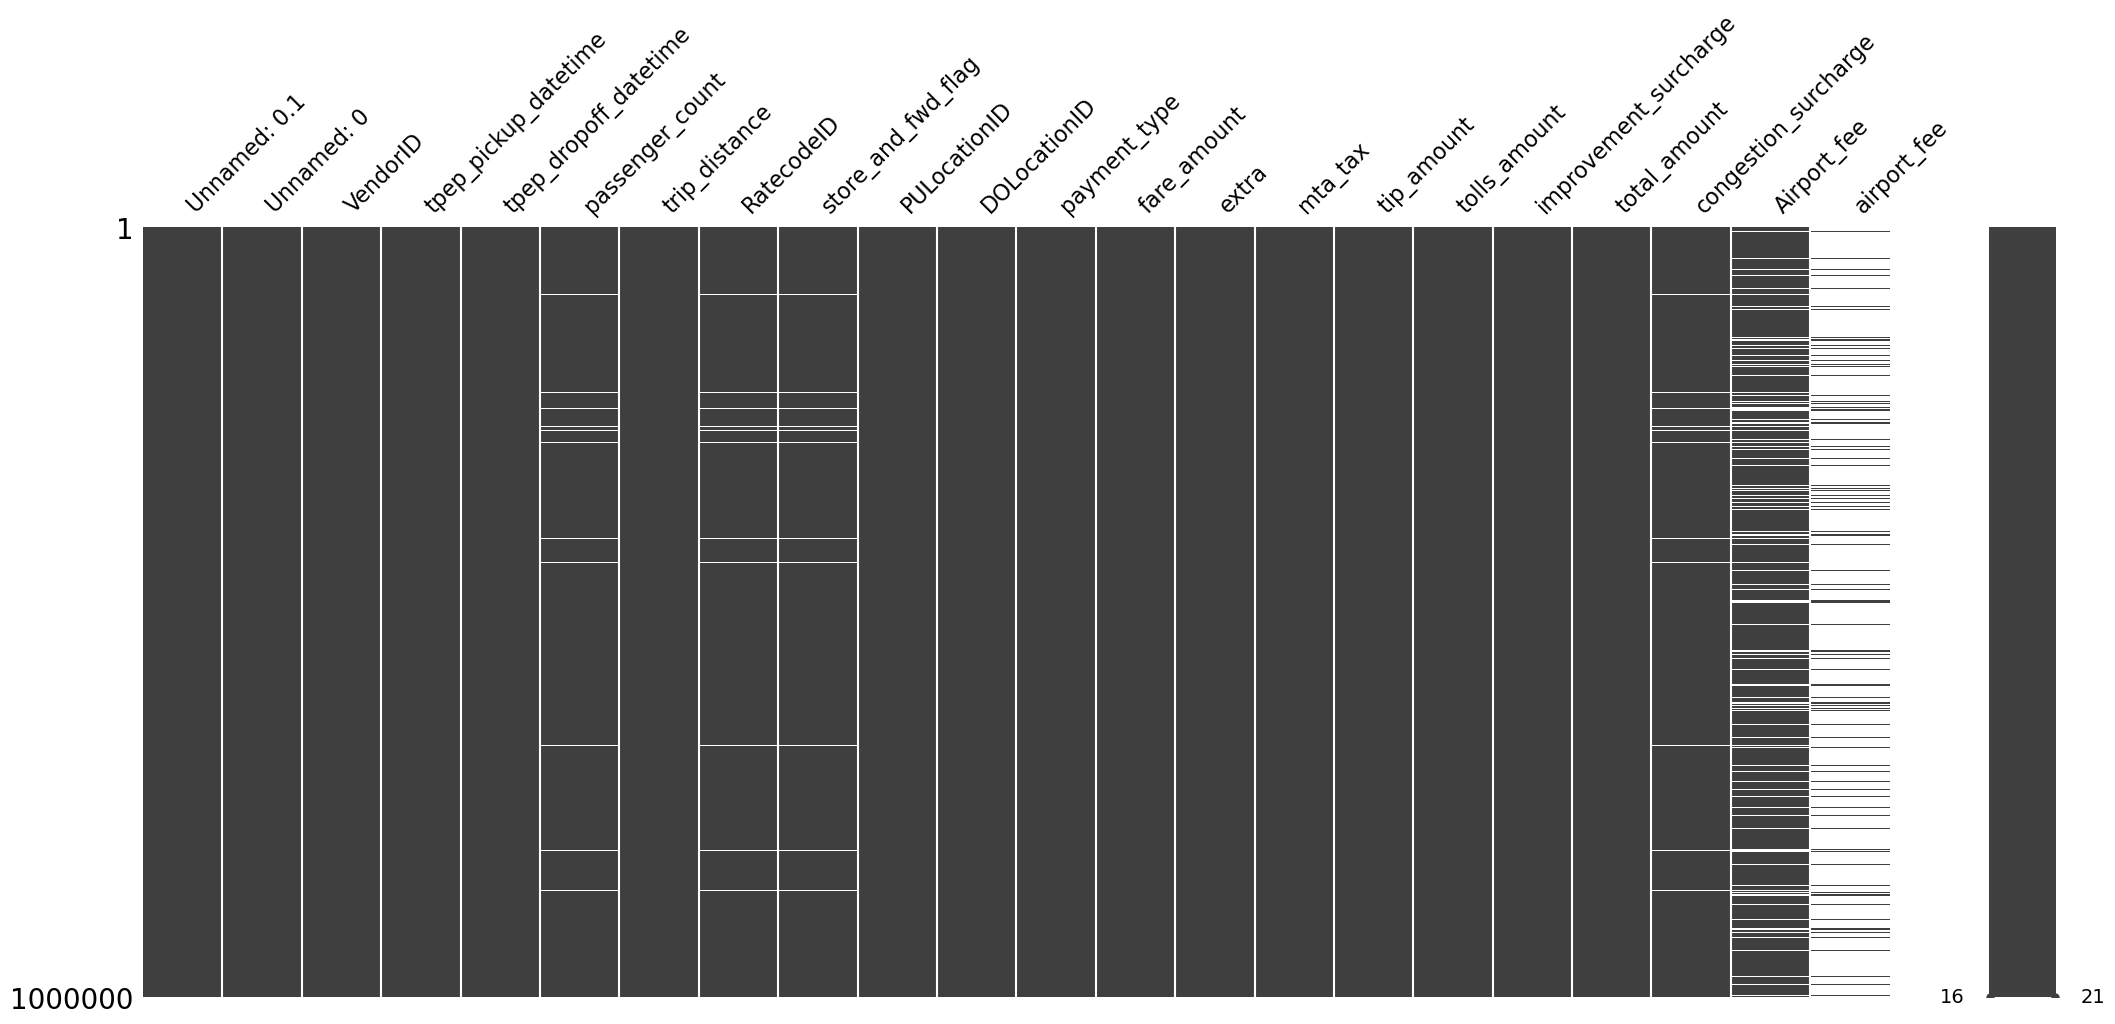

In [12]:
import missingno as msno
#selection=random_selection_fixed =df.sample(1000, random_state=42)
df.info()
msno.matrix(df)

<AxesSubplot:>

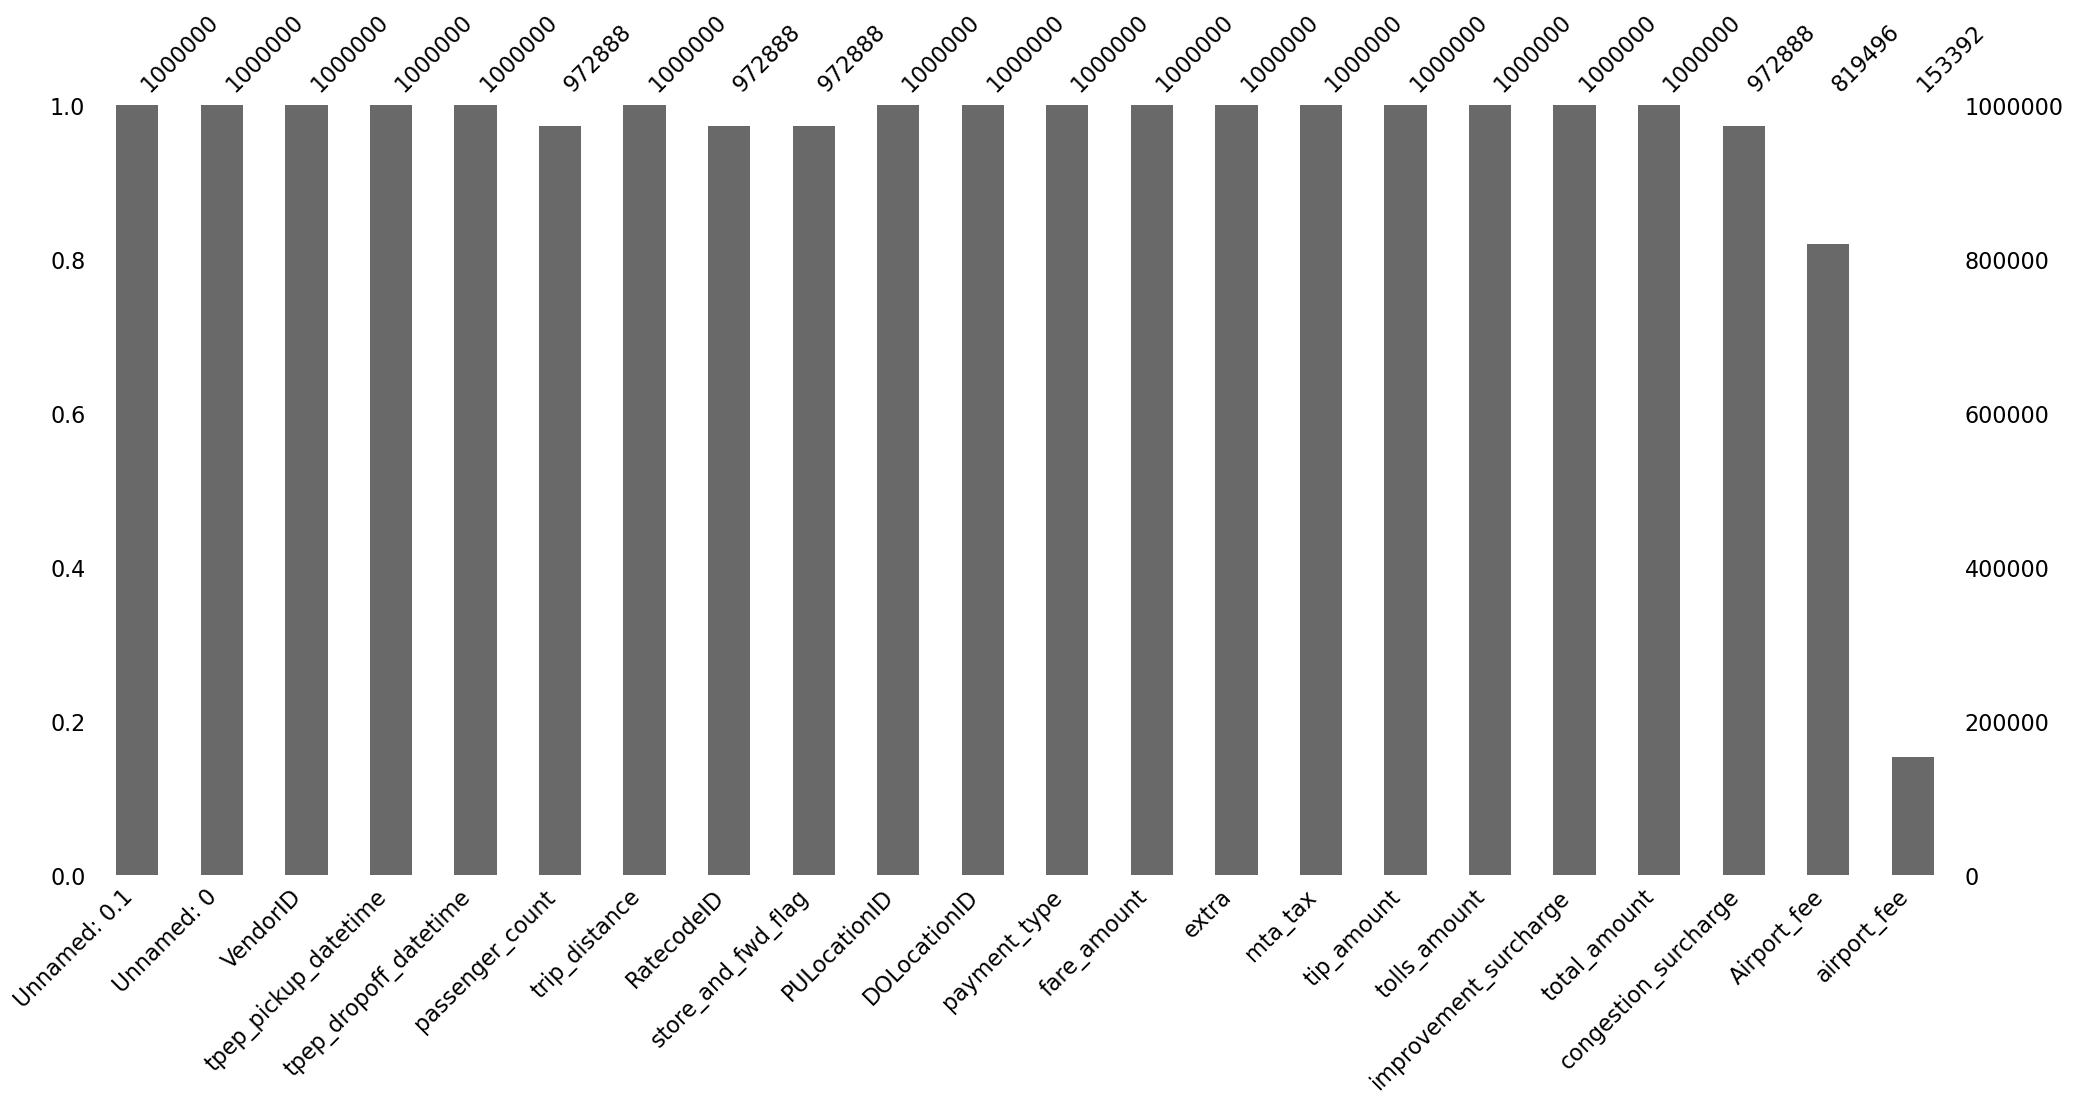

In [13]:
msno.bar(df)

In [14]:
df.head(20)

,Unnamed: 0.1,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee
0,9194462,9194462,2,2023-04-09 17:39:57,2023-04-09 18:13:31,2.0,9.81,1.0,N,132,...,45.0,0.00,0.5,3.00,0.00,1.0,51.25,0.0,1.75,NaN
1,16987466,16987466,2,2023-01-26 14:47:44,2023-01-26 14:53:07,1.0,0.99,1.0,N,170,...,7.2,0.00,0.5,2.24,0.00,1.0,13.44,2.5,NaN,0.0
2,6908899,6908899,2,2023-04-30 01:08:10,2023-04-30 01:20:46,2.0,2.85,1.0,N,114,...,15.6,1.00,0.5,4.12,0.00,1.0,24.72,2.5,0.00,NaN
3,4617323,4617323,1,2023-05-19 17:10:40,2023-05-19 17:23:00,1.0,1.80,1.0,N,229,...,12.1,5.00,0.5,3.70,0.00,1.0,22.30,2.5,0.00,NaN
4,14262454,14262454,2,2023-02-21 21:34:26,2023-02-21 21:38:01,1.0,1.23,1.0,N,48,...,7.2,1.00,0.5,2.44,0.00,1.0,14.64,2.5,0.00,NaN
5,2558472,2558472,2,2023-06-07 15:36:58,2023-06-07 16:00:00,1.0,1.55,1.0,N,48,...,19.1,0.00,0.5,0.00,0.00,1.0,23.10,2.5,0.00,NaN
6,18932887,18932887,2,2023-01-07 12:24:30,2023-01-07 12:36:47,1.0,2.07,1.0,N,186,...,13.5,0.00,0.5,4.38,0.00,1.0,21.88,2.5,NaN,0.0
7,11697625,11697625,2,2023-03-17 10:47:59,2023-03-17 11:00:59,1.0,1.99,1.0,N,75,...,14.2,0.00,0.5,0.00,0.00,1.0,15.70,0.0,0.00,NaN
8,4963291,4963291,2,2023-05-16 22:57:50,2023-05-16 23:10:58,1.0,6.48,1.0,N,138,...,26.8,6.00,0.5,6.86,0.00,1.0,42.91,0.0,1.75,NaN
9,7604174,7604174,1,2023-04-24 01:27:06,2023-04-24 01:27:55,1.0,0.00,5.0,N,50,...,40.0,0.00,0.0,0.00,0.00,1.0,41.00,0.0,0.00,NaN


In [15]:
# Lets use a real type for the NaN values
import numpy as np
df = df.replace("NaN", np.nan)
df.head(20)

,Unnamed: 0.1,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee
0,9194462,9194462,2,2023-04-09 17:39:57,2023-04-09 18:13:31,2.0,9.81,1.0,N,132,...,45.0,0.00,0.5,3.00,0.00,1.0,51.25,0.0,1.75,NaN
1,16987466,16987466,2,2023-01-26 14:47:44,2023-01-26 14:53:07,1.0,0.99,1.0,N,170,...,7.2,0.00,0.5,2.24,0.00,1.0,13.44,2.5,NaN,0.0
2,6908899,6908899,2,2023-04-30 01:08:10,2023-04-30 01:20:46,2.0,2.85,1.0,N,114,...,15.6,1.00,0.5,4.12,0.00,1.0,24.72,2.5,0.00,NaN
3,4617323,4617323,1,2023-05-19 17:10:40,2023-05-19 17:23:00,1.0,1.80,1.0,N,229,...,12.1,5.00,0.5,3.70,0.00,1.0,22.30,2.5,0.00,NaN
4,14262454,14262454,2,2023-02-21 21:34:26,2023-02-21 21:38:01,1.0,1.23,1.0,N,48,...,7.2,1.00,0.5,2.44,0.00,1.0,14.64,2.5,0.00,NaN
5,2558472,2558472,2,2023-06-07 15:36:58,2023-06-07 16:00:00,1.0,1.55,1.0,N,48,...,19.1,0.00,0.5,0.00,0.00,1.0,23.10,2.5,0.00,NaN
6,18932887,18932887,2,2023-01-07 12:24:30,2023-01-07 12:36:47,1.0,2.07,1.0,N,186,...,13.5,0.00,0.5,4.38,0.00,1.0,21.88,2.5,NaN,0.0
7,11697625,11697625,2,2023-03-17 10:47:59,2023-03-17 11:00:59,1.0,1.99,1.0,N,75,...,14.2,0.00,0.5,0.00,0.00,1.0,15.70,0.0,0.00,NaN
8,4963291,4963291,2,2023-05-16 22:57:50,2023-05-16 23:10:58,1.0,6.48,1.0,N,138,...,26.8,6.00,0.5,6.86,0.00,1.0,42.91,0.0,1.75,NaN
9,7604174,7604174,1,2023-04-24 01:27:06,2023-04-24 01:27:55,1.0,0.00,5.0,N,50,...,40.0,0.00,0.0,0.00,0.00,1.0,41.00,0.0,0.00,NaN


<AxesSubplot:>

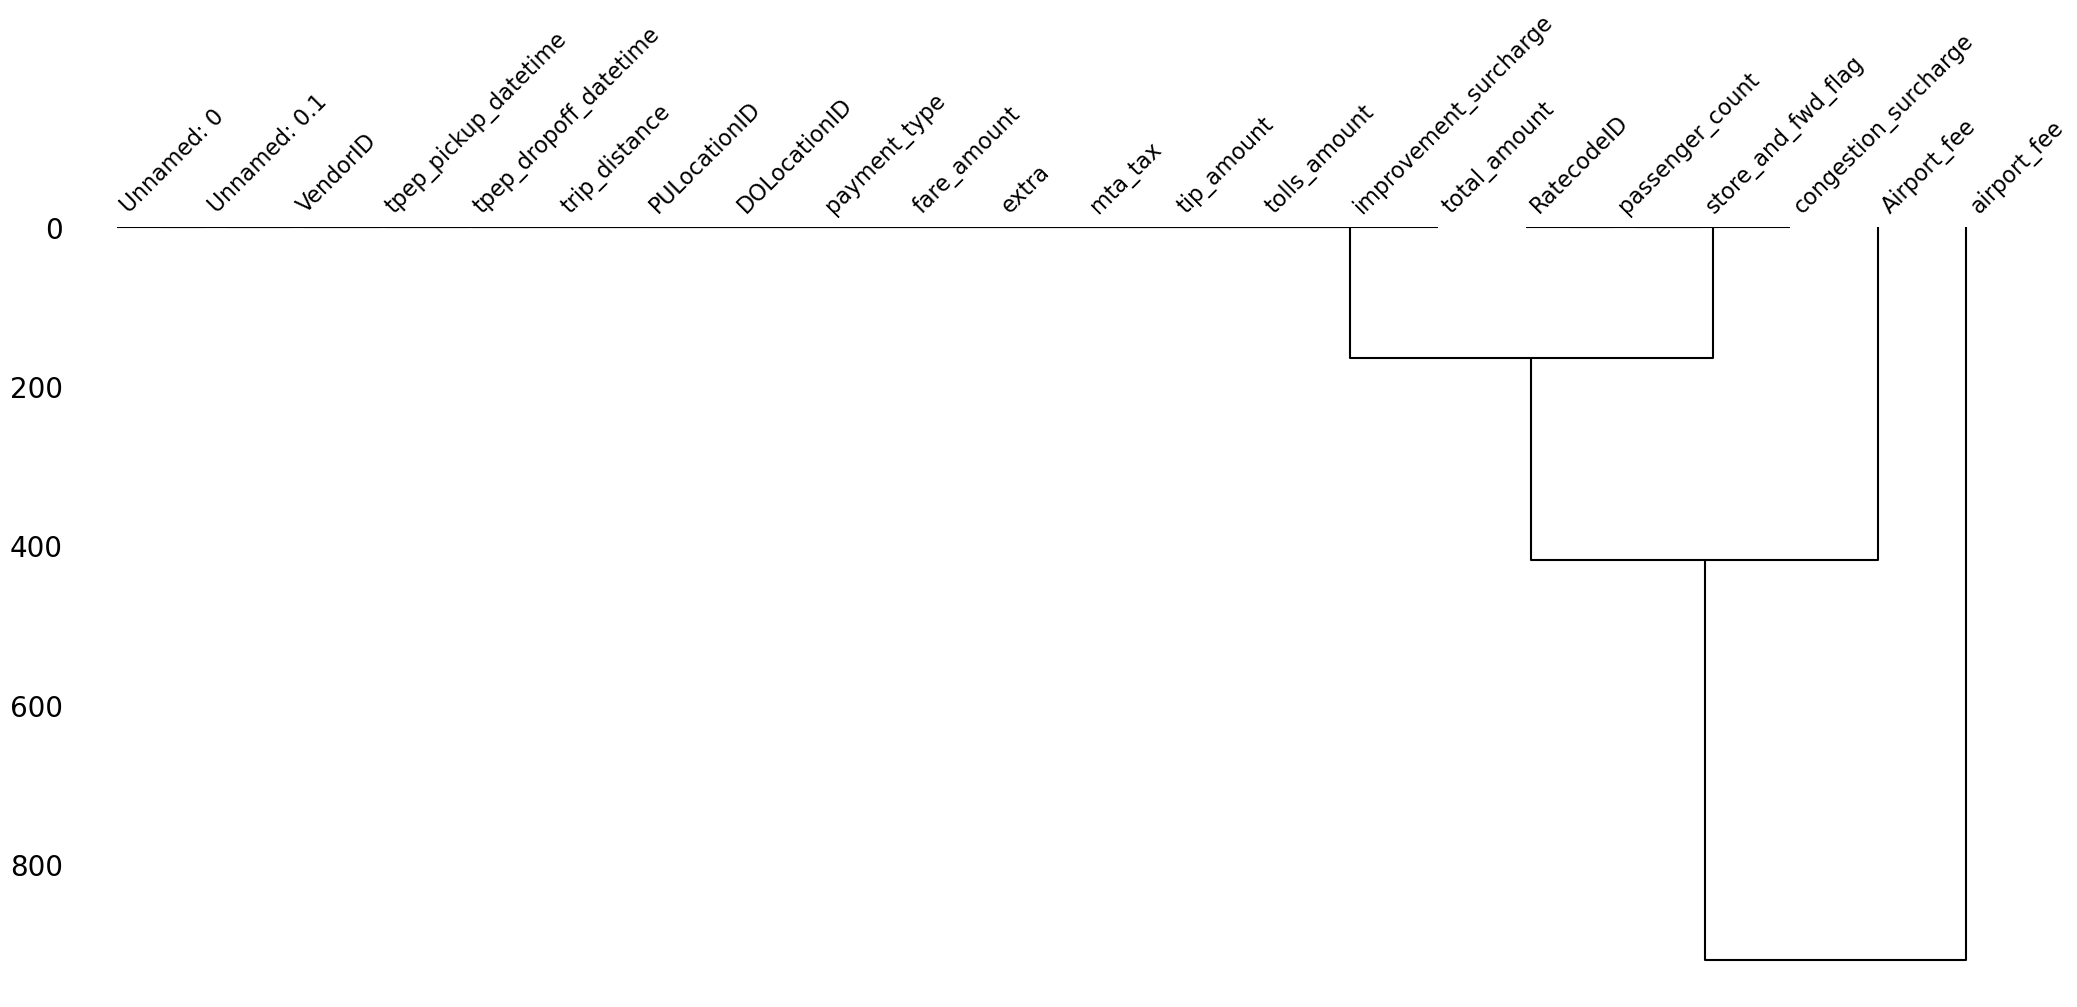

In [16]:
msno.dendrogram(df)

In [17]:
df.isnull().sum()

Unnamed: 0.1                  0
Unnamed: 0                    0
VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count           27112
trip_distance                 0
RatecodeID                27112
store_and_fwd_flag        27112
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge      27112
Airport_fee              180504
airport_fee              846608
dtype: int64

In [18]:
df["passenger_count_corrected"] = df["passenger_count"] 
df["passenger_count_corrected"].fillna(df["passenger_count"].median(), inplace=True)

In [19]:
df.head(20)

,Unnamed: 0.1,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee,passenger_count_corrected
0,9194462,9194462,2,2023-04-09 17:39:57,2023-04-09 18:13:31,2.0,9.81,1.0,N,132,...,0.00,0.5,3.00,0.00,1.0,51.25,0.0,1.75,NaN,2.0
1,16987466,16987466,2,2023-01-26 14:47:44,2023-01-26 14:53:07,1.0,0.99,1.0,N,170,...,0.00,0.5,2.24,0.00,1.0,13.44,2.5,NaN,0.0,1.0
2,6908899,6908899,2,2023-04-30 01:08:10,2023-04-30 01:20:46,2.0,2.85,1.0,N,114,...,1.00,0.5,4.12,0.00,1.0,24.72,2.5,0.00,NaN,2.0
3,4617323,4617323,1,2023-05-19 17:10:40,2023-05-19 17:23:00,1.0,1.80,1.0,N,229,...,5.00,0.5,3.70,0.00,1.0,22.30,2.5,0.00,NaN,1.0
4,14262454,14262454,2,2023-02-21 21:34:26,2023-02-21 21:38:01,1.0,1.23,1.0,N,48,...,1.00,0.5,2.44,0.00,1.0,14.64,2.5,0.00,NaN,1.0
5,2558472,2558472,2,2023-06-07 15:36:58,2023-06-07 16:00:00,1.0,1.55,1.0,N,48,...,0.00,0.5,0.00,0.00,1.0,23.10,2.5,0.00,NaN,1.0
6,18932887,18932887,2,2023-01-07 12:24:30,2023-01-07 12:36:47,1.0,2.07,1.0,N,186,...,0.00,0.5,4.38,0.00,1.0,21.88,2.5,NaN,0.0,1.0
7,11697625,11697625,2,2023-03-17 10:47:59,2023-03-17 11:00:59,1.0,1.99,1.0,N,75,...,0.00,0.5,0.00,0.00,1.0,15.70,0.0,0.00,NaN,1.0
8,4963291,4963291,2,2023-05-16 22:57:50,2023-05-16 23:10:58,1.0,6.48,1.0,N,138,...,6.00,0.5,6.86,0.00,1.0,42.91,0.0,1.75,NaN,1.0
9,7604174,7604174,1,2023-04-24 01:27:06,2023-04-24 01:27:55,1.0,0.00,5.0,N,50,...,0.00,0.0,0.00,0.00,1.0,41.00,0.0,0.00,NaN,1.0


In [20]:
df.isnull().sum()

Unnamed: 0.1                      0
Unnamed: 0                        0
VendorID                          0
tpep_pickup_datetime              0
tpep_dropoff_datetime             0
passenger_count               27112
trip_distance                     0
RatecodeID                    27112
store_and_fwd_flag            27112
PULocationID                      0
DOLocationID                      0
payment_type                      0
fare_amount                       0
extra                             0
mta_tax                           0
tip_amount                        0
tolls_amount                      0
improvement_surcharge             0
total_amount                      0
congestion_surcharge          27112
Airport_fee                  180504
airport_fee                  846608
passenger_count_corrected         0
dtype: int64